# CQF Exam 3

## January 2024 Cohort

## Task 1

What is the cost function of Logistic Regression? Explain in Detail.

### Answer:
This follows mostly [1] (p. 7-10, 25-26) and [2].

Logistic regression is one of the most used machine learning methods for classification mapping qualitative data onto categorical variables, e.g. either 0 or 1. The cost function derived for logistic regression is the so-called Binary Cross Entropy cost function and can be derived as follows:

***1. Logistic probability predictor via logit function***

To model the probability $p$ of the classification mapping to 1, we can invert the logit function that converts log-odds to probabilities $$logit(p) = \log\left(\frac{p}{1 - p}\right)=z,$$ solving for $$p=\frac{1}{1 + e^{-z}}=:\sigma(z).$$ This so-called sigmoid function can be used to model probabilities as it yields values between 0 and 1, as can seen per plot below:

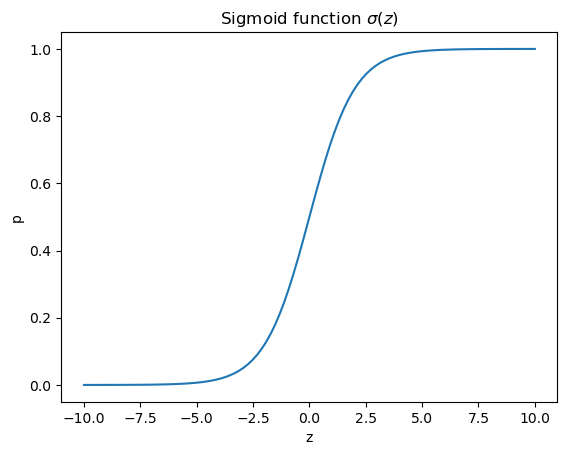

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
p = sigmoid(z)

plt.figure()
plt.plot(z, p)
plt.title('Sigmoid function $\sigma(z)$')
plt.xlabel('z')
plt.ylabel('p')
plt.show()

Now, the predictor function for a training data point $(x,y)$ is given by the sigmoid function applied to the linear combination of input features:
$$\hat{y}=P(Y=1|X=x) = \sigma(\mathbf{w}\cdot\mathbf{x}).$$

***2. Probability of the output $y$***

For a given input $x$ and its corresponding label $y$:
$$P(Y=y|X=x)=
\begin{cases}
\hat{y} = \sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=1\\
1-\hat{y} = 1-\sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=0.
\end{cases}$$

***3. Bernoulli distribution***

If $y$ can either take values 0 or 1, then $Y \sim \text{Ber}(p)$ follows a Bernoulli distribution with $p = \sigma(\mathbf{w} \cdot \mathbf{x})$. Hence:
\begin{align*}
P(Y=y|X=x) &=p^y \cdot (1-p)^{(1-y)}\\
&=\sigma(\mathbf{w}\cdot\mathbf{x})^y \cdot \left(1-\sigma(\mathbf{w}\cdot\mathbf{x})\right)^{(1-y)}\\
&=\hat{y}^y \cdot \left(1-\hat{y}\right)^{(1-y)}
\end{align*}

***4. Log-likelihood***

Taking the natural logarithm of the probability of the above and applying logarithm laws yields
$$\log P(Y=y|X=x) = y\log(\hat{y}) + (1-y)\log(1-\hat{y}).$$

***5. Cost function for one training data point $(x,y)$***

To convert this problem into a minimization problem, we consider the negative of the log-likelihood. For a single training example $(x,y)$, we obtain the cost function:
$$L(\hat{y}, y) = -\log P(y|x) = -\left(y\log(\hat{y}) + (1-y)\log(1-\hat{y})\right)$$

***6. Cost function for the entire dataset***

To get the cost function for the entire training dataset, we sum over all training examples and take the average. If we have $n$ training examples, the cost function called the *Binary Cross Entropy function* is then obtained as
\begin{align*}
J(\mathbf{w}) &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\sigma(\mathbf{w}\cdot x^{(i)})) + (1-y^{(i)})\log(1-\sigma(\mathbf{w}\cdot x^{(i)}))\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\right)
\end{align*}

This cost function is minimized to train the logistic regression model, leading to optimal parameters $\mathbf{w}$ that best fit the training data. Since the function is convex, we can use gradient descent to find the global minimum.

## Task 2

What are voting classifers in ensemble learning?

### Answer:
This follows mostly [3] and [4].

Ensemble models are machine learning models that combine multiple individual predictors to arrive at a prediction. A group of predictors forms an ensemble. The idea is that the collective of multiple models often produces better results than a single model in both efficiency and accuracy. To combine the various classifiers into a final predictor, there are different voting classifiers, such as:

**1. Arithmetic averaging**: Each individual model makes a prediction. The final prediction determined by taking the arithmetic average over all individual predictions. This voting style is used in Bagging algorithms like Random Forests which use Decision Trees and can help to reduce variance (help with overfitting).

As a prominent example, the final estimator to a regression problem employing Random Forests sampled into $M$ data sets from the original data set $\mathcal{D}: \mathcal{D}_1,...,\mathcal{D}_M$ trained to maximum depth $f(x,\mathcal{D}_i)$ is given by
$$\hat{f}(x) = \frac{1}{M}\sum_{i=1}^{M}f(x;\mathcal{D}_i).$$

**2. Weighted vote classifiers**: This approach is often used in Boosting algorithms with base models that are weak learning algorithms, i.e. only *slightly* better than chance (e.g. decision tree with low depth and high bias). Boosting algorithms are addititive models which are sequentially trained on smaller structures. Each model aims to correct the errors of its predecessor by adjusting weights used in the weighted average, while the metric to measure (and therefore correct) the error of the predecessor model may vary depending on loss function. Such Boosting algorithms like AdaBoost or Gradient Boosting can help to reduce bias.

As a prominent example, the final estimator to a classification problem with $(x_i,y_i)\in(X,\pm 1)$ of AdaBoost sampled over $M$ weak learners $G_m(x_i)$ is given by the weighted sum
$$\hat{G}(x) = \text{sign}\left(\sum_{m=1}^{M} \alpha_m G_m(x)\right).$$
The weights $\alpha_m = \ln\left(\frac{1 - e_m}{e_m}\right)$ will focus more on weak learners with high errors $$e_m = \frac{\sum_{i=1}^{N} w_i \mathbb{1}_{y_i\neq G(x_i)}}{\sum_{i=1}^{N} w_i}$$
in an attempt to improve the weakest weak learners. The data points $(x_i,y_i)$ are then re-weighted to finally obtain the final ensemble prediction.

**3. Hard voting**: This is a majority voting classifier where the final predictor will be determined by choosing the prediction with the most votes among the individual models. It is often used in classification algorithms, according to Dr. Panos Parpas' lecture, this is e.g. used in Bagging algorithms tailored for classification rather than regression problems. In this method, each model casts a vote for a class, and the class with the most votes is chosen as the final prediction.

**4. Soft Voting**: Unlike hard voting which counts the votes of each classifier in the ensemble and selects the class with the most votes, soft voting calculates the average predicted probabilities of each class for all classifiers and selects the class with the highest average probability. This can provide a more accurate prediction because soft voting also considers the confidence of each model.

## Task 3: Short-term asset return prediction

Follow the 7-steps to model building for your selected ticker,

* (a) produce a model to predict positive moves (up trend) using Support Vector Machine (SVM) model.
* (b) tune hyperparameters for the estimator and present the best model.
* (c) investigate the prediction quality using area under ROC curve, confusion matrix and classification report.

### Answer:
The 7 steps to model building are explained in [5] as follows:

1. Understand the problem
2. Collect data
3. Explore data (visualization!)
4. Clean data (pre-process)
5. Transform data (normalization)
6. Select the appropriate model + train
7. Validate the model

We shall now implement these on S&P 500 data following mostly the approach from Python Labs [2] with some adjustments.

In [103]:
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

In [115]:
df = yf.download('^GSPC', start="2000-01-01")
df['Return'] = df['Adj Close'].pct_change()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090


In [116]:
# Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6135 entries, 2000-01-03 to 2024-05-21
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6135 non-null   float64
 1   High       6135 non-null   float64
 2   Low        6135 non-null   float64
 3   Close      6135 non-null   float64
 4   Adj Close  6135 non-null   float64
 5   Volume     6135 non-null   int64  
 6   Return     6134 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 383.4 KB


In [117]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090


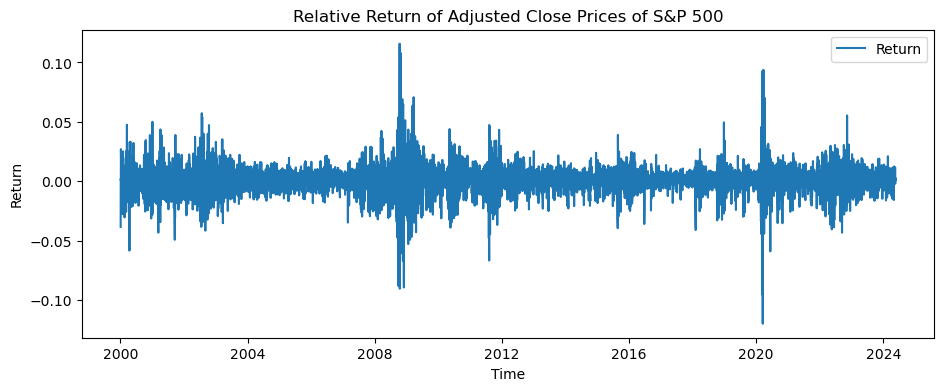

In [118]:
# Visualize the return data
plt.figure(figsize=(11, 4))
plt.plot(df['Return'], label='Return')
plt.title('Relative Return of Adjusted Close Prices of S&P 500')
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.show()

In [119]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6135.0,2.022471e+03,1.121268e+03,6.792800e+02,1.194940e+03,1.467630e+03,2.664095e+03,5.310070e+03
High,6135.0,2.034267e+03,1.126625e+03,6.952700e+02,1.202665e+03,1.476430e+03,2.682800e+03,5.325490e+03
Low,6135.0,2.009828e+03,1.115752e+03,6.667900e+02,1.187420e+03,1.457150e+03,2.648605e+03,5.302400e+03
Close,6135.0,2.022783e+03,1.121593e+03,6.765300e+02,1.195650e+03,1.468330e+03,2.663835e+03,5.321410e+03
Adj Close,6135.0,2.022783e+03,1.121593e+03,6.765300e+02,1.195650e+03,1.468330e+03,2.663835e+03,5.321410e+03
Volume,6135.0,3.337962e+09,1.501085e+09,3.560700e+08,2.131680e+09,3.463140e+09,4.160005e+09,1.145623e+10
Return,6134.0,2.871139e-04,1.229471e-02,-1.198406e-01,-4.811968e-03,5.929404e-04,5.935448e-03,1.158004e-01


Check if original data needs cleaning + clean appropriately

In [120]:
 # Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       1
dtype: int64

Clean the data + remove NaN value from "Return" column:

In [121]:
df = df.dropna()  # drop NaN values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

#### Feature engineering

Features are independent variables which are used to determine the value of the target variable. We will generate a set of features from the downloaded dataset. Some feature engineering follows [2], consisting of statistical measures, spreads, moving averages of various other quantifiers on the downloaded data set. An additional interesting feature could be the Moving Average Convergence Divergence (MACD) [6], calculated as the difference between the 12-day EMA and the 26-day EMA. This MACD is often used in trend analysis of stock markets. Some of the generated features will likely be correlated, but we can analyze in the following.

In [122]:
def get_features(df):
    df['O-C'] = df['Open'] - df['Close']  # difference between open and close prices, measuring intraday movement range
    df['H-L'] = df['High'] - df['Low']  # difference between high and low prices, measuring intraday range
    df['Sign'] = np.sign(np.log(df['Close'] / df['Close'].shift(1)))  # sign of return

    for lag in [1, 2, 3, 5, 10, 30]:  # lagged returns for different lag periods
        df[f'Past Return_{lag}'] = df['Return'].shift(lag)

    for momentum_period in [1, 2, 3, 5, 10, 30]:  # price change over different momentum periods
        df[f'Momentum_{momentum_period}'] = df['Close'] - df['Close'].shift(momentum_period)

    for sma_period in [1, 2, 3, 5, 10, 30]:  # simple moving average over various time periods
        df[f'SMA_{sma_period}'] = df['Close'].rolling(window=sma_period).mean()

    for ema_period in [1, 2, 3, 5, 10, 30]:  # exponential moving average over various time periods
        df[f'EMA_{ema_period}'] = df['Close'].ewm(span=ema_period, adjust=False).mean()

    df.dropna(inplace=True)
    features = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    return features


features = get_features(df)
features.head()

,Adj Close,Return,O-C,H-L,Sign,Past Return_1,Past Return_2,Past Return_3,Past Return_5,Past Return_10,...,SMA_3,SMA_5,SMA_10,SMA_30,EMA_1,EMA_2,EMA_3,EMA_5,EMA_10,EMA_30
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-16,1387.670044,-0.010256,14.380005,18.970093,-1.0,0.008713,0.002033,-0.020969,-0.020815,-0.000114,...,1393.220011,1396.721997,1411.061987,1419.536332,1387.670044,1391.392004,1393.490425,1397.477373,1403.725850,1410.789137
2000-02-17,1388.260010,0.000425,-0.589966,19.810059,1.0,-0.010256,0.008713,0.002033,0.003627,0.011248,...,1392.660034,1391.008008,1407.390991,1419.074666,1388.260010,1389.304008,1390.875217,1394.404919,1400.913879,1409.335645
2000-02-18,1346.089966,-0.030376,42.170044,43.270020,-1.0,0.000425,-0.010256,0.008713,-0.020969,-0.000421,...,1374.006673,1382.802002,1399.562988,1417.162667,1346.089966,1360.494646,1368.482592,1378.299934,1390.945895,1405.255279
2000-02-22,1352.170044,0.004517,-6.080078,26.229980,1.0,-0.030376,0.000425,-0.010256,0.002033,-0.000091,...,1362.173340,1375.248022,1392.355994,1414.186003,1352.170044,1354.944911,1360.326318,1369.589971,1383.895740,1401.830425
2000-02-23,1360.689941,0.006301,-8.519897,27.670044,1.0,0.004517,-0.030376,0.000425,0.008713,0.012273,...,1352.983317,1366.976001,1384.252991,1410.955668,1360.689941,1358.774931,1360.508130,1366.623294,1379.676504,1399.176200


In [102]:
# Specify X
X = features.values

In [39]:
from sklearn import svm
from sklearn.model_selection import train_test_split


# Prepare the data
df['Up Trend'] = np.where(df['Return'] > 0, 1, 0)  # create binary variable

# Define features X and target y
X = df['Return'].values.reshape(-1, 1)  # reshape is needed because we have only one feature
y = df['Up Trend']  # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVM Classifier
clf = svm.SVC(kernel='linear')  # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Step 3: Create a target variable for uptrends
df['Up Trend'] = np.where(df['Return'] > 0, 1, 0)

# Step 4: Drop NaN values (first row will have NaN return)
df = df.dropna()

# Step 5: Prepare features and target variable
X = df[['Return']]  # Using 'Return' as the only feature
y = df['Up Trend']

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Train the SVM model
model = SVC(kernel='linear')  # Using a linear kernel
model.fit(X_train, y_train)

# Step 8: Predict on the testing set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.5876120619396903
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20       568
           1       0.57      1.00      0.72       659

    accuracy                           0.59      1227
   macro avg       0.78      0.55      0.46      1227
weighted avg       0.77      0.59      0.48      1227



## References

* [1]: JA244.5: Lecture Notes on Supervised Learning II by Kannan Singaravelu, CQF Faculty
* [2]: JA24P10: CQF Python Labs on Trend prediction using Logistic Regression by Kannan Singaravelu
* [3]: JA244.6: Lecture Notes on Decision Trees & Ensemble Models by Dr. Panos Parpas, CQF Associate Faculty
* [4]: JA24P11: CQF Python Labs on Gradient Boosting for Price Prediction by Kannan Singaravelu
* [5]: JA244.4: Lecture Notes on Supervised Learning I by Kannan Singaravelu, CQF Faculty
* [6]: [Investopedia explanation of MACD](https://www.investopedia.com/terms/m/macd.asp)